# **🔍 Exploration and Data Preprocessing**

In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **💽 Download the Data and Investigate the Columns**

The data is available as a CSV file. We will use the `pandas` library to read the data into a `DataFrame` and keep only the columns that we are interested in. The data contains the following columns:
| Column Name | Type | Description |
| --- | --- | --- |
| `BETRIEBSTAG` | Date (DD.MM.YYYY) | Date of the journey |
| `FAHRT_BEZEICHNER` | String | Identifier of the journey (see https://opentransportdata.swiss/en/cookbook/fahrt-id-journeyref/) |
| `BETREIBER_ID` | String | Identifier of the operator |
| `BETREIBER_ABK` | String | Abbreviation of the operator |
| `BETREIBER_NAME` | String | Name of the operator |
| `PRODUKT_ID` | Category | Identifier of the product |
| `LINIEN_ID` | String | Identifier of the line |
| `LINIEN_TEXT` | String | Name of the line |
| `UMLAUF_ID` | String | Identifier of the circuit (see https://opentransportdata.swiss/en/cookbook/umlauf/)|
| `VERKEHRSMITTEL_TEXT` | String | Type of transport |
| `ZUSATZFAHRT_TF` | Boolean | Whether the journey is an additional one |
| `FAELLT_AUS_TF` | Boolean | Whether the journey is cancelled |
| `BPUIC` | String | Identifier of the stop (see https://didok.ch/en/glossary-stop-points-location-codes/) |
| `HALTESTELLEN_NAME` | String | Name of the stop |
| `ANKUNFTSZEIT` | DateTime (DD.MM.YYYY HH:MM:SS) | Arrival time at the stop |
| `AN_PROGNOSE` | DateTime (DD.MM.YYYY HH:MM:SS) | Arrival time at the stop (predicted) |
| `AN_PROGNOSE_STATUS` | Category | Status of the predicted arrival time |
| `ABFAHRTSZEIT` | DateTime (DD.MM.YYYY HH:MM:SS) | Departure time from the stop |
| `AB_PROGNOSE` | DateTime (DD.MM.YYYY HH:MM:SS) | Departure time from the stop (predicted) |
| `AB_PROGNOSE_STATUS` | Category | Status of the predicted departure time |
| `DURCHFAHRT_TF` | Boolean | Whether the stop is a through stop |

In [268]:
# False if you want to download the data from the internet
LOCAL_DOWNLOAD = True
DATE_FILE = '2023-03-10' # Format YYYY-MM-DD

In [293]:
# Download the data
DATA_LINK = f"https://opentransportdata.swiss/dataset/0edc74a3-ad4d-486e-8657-f8f3b34a0979/resource/9de83058-0365-481d-85fa-a8477709b9fa/download/{DATE_FILE}_istdaten.csv"
DATA_FILE = f"data/{DATE_FILE}_istdaten.csv"
DATA_PATH = DATA_FILE if LOCAL_DOWNLOAD else DATA_LINK
transport_data = pd.read_csv(
    DATA_PATH, 
    sep=';',
    parse_dates=['BETRIEBSTAG', 'ANKUNFTSZEIT', 'AN_PROGNOSE', 'ABFAHRTSZEIT', 'AB_PROGNOSE'],
    dtype={
        'FAHRT_BEZEICHNER': 'string',
        'BETRIEBER_ID': 'string',
        'BETREIBER_ABK': 'string',
        'BETREIBER_NAME': 'string',
        'PRODUKT_ID': 'category',
        'LINIEN_ID': 'string',
        'LINIEN_TEXT': 'string',
        'UMLAUF_ID': 'string',
        'VERKEHRSMITTEL_TEXT': 'string',
        'ZUSATZFAHRT_TF': 'boolean',
        'FAELLT_AUS_TF': 'boolean',
        'BPUIC': 'int',
        'HALTESTELLEN_NAME': 'string',
        'AN_PROGNOSE_STATUS': 'category',
        'AB_PROGNOSE_STATUS': 'category',
        'DURCHFAHRT_TF': 'boolean'
    },
    dayfirst=True
)

In [294]:
transport_data.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2023-03-10,80:800631:17230:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17230,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 04:59:00,2023-03-10 04:59:00,PROGNOSE,NaT,NaT,NaN,False
1,2023-03-10,80:800631:17233:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17233,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:07:00,2023-03-10 06:07:00,PROGNOSE,False
2,2023-03-10,80:800631:17234:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17234,RB,<NA>,RB,...,True,8500090,Basel Bad Bf,2023-03-10 05:56:00,NaT,UNBEKANNT,NaT,NaT,UNBEKANNT,False
3,2023-03-10,80:800631:17235:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17235,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:43:00,2023-03-10 06:43:00,PROGNOSE,False
4,2023-03-10,80:800631:17236:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17236,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 06:33:00,2023-03-10 06:37:00,PROGNOSE,NaT,NaT,NaN,False


In [295]:
transport_data.dtypes

BETRIEBSTAG            datetime64[ns]
FAHRT_BEZEICHNER               string
BETREIBER_ID                   object
BETREIBER_ABK                  string
BETREIBER_NAME                 string
PRODUKT_ID                   category
LINIEN_ID                      string
LINIEN_TEXT                    string
UMLAUF_ID                      string
VERKEHRSMITTEL_TEXT            string
ZUSATZFAHRT_TF                boolean
FAELLT_AUS_TF                 boolean
BPUIC                           int32
HALTESTELLEN_NAME              string
ANKUNFTSZEIT           datetime64[ns]
AN_PROGNOSE            datetime64[ns]
AN_PROGNOSE_STATUS           category
ABFAHRTSZEIT           datetime64[ns]
AB_PROGNOSE            datetime64[ns]
AB_PROGNOSE_STATUS           category
DURCHFAHRT_TF                 boolean
dtype: object

## **💬 Translate Column Names**

In [296]:
translations = {
    'BETRIEBSTAG': 'date',
    'FAHRT_BEZEICHNER': 'trip_id',
    'BETREIBER_ID': 'operator_id',
    'BETREIBER_ABK': 'operator_abbreviation',
    'BETREIBER_NAME': 'operator_name',
    'PRODUKT_ID': 'product_id',
    'LINIEN_ID': 'line_id',
    'LINIEN_TEXT': 'line_text',
    'UMLAUF_ID': 'circuit_id',
    'VERKEHRSMITTEL_TEXT': 'transport_type',
    'ZUSATZFAHRT_TF': 'is_additional_trip',
    'FAELLT_AUS_TF': 'is_cancelled',
    'BPUIC': 'stop_id',
    'HALTESTELLEN_NAME': 'stop_name',
    'ANKUNFTSZEIT': 'arrival_time',
    'AN_PROGNOSE': 'arrival_forecast',
    'AN_PROGNOSE_STATUS': 'arrival_forecast_status',
    'ABFAHRTSZEIT': 'departure_time',
    'AB_PROGNOSE': 'departure_forecast',
    'AB_PROGNOSE_STATUS': 'departure_forecast_status',
    'DURCHFAHRT_TF': 'is_through_trip'
}

transport_data = transport_data.rename(columns=translations)
transport_data.head()

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
0,2023-03-10,80:800631:17230:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17230,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 04:59:00,2023-03-10 04:59:00,PROGNOSE,NaT,NaT,NaN,False
1,2023-03-10,80:800631:17233:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17233,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:07:00,2023-03-10 06:07:00,PROGNOSE,False
2,2023-03-10,80:800631:17234:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17234,RB,<NA>,RB,...,True,8500090,Basel Bad Bf,2023-03-10 05:56:00,NaT,UNBEKANNT,NaT,NaT,UNBEKANNT,False
3,2023-03-10,80:800631:17235:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17235,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:43:00,2023-03-10 06:43:00,PROGNOSE,False
4,2023-03-10,80:800631:17236:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17236,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 06:33:00,2023-03-10 06:37:00,PROGNOSE,NaT,NaT,NaN,False


## **🧼 Clean Data and Analyse Missing Values**

In [297]:
print(f"Number of rows in the dataset: {transport_data.shape[0]:,}")

Number of rows in the dataset: 2,347,175


In [298]:
# Get number of missing values per column
print(f"Number of total missing values in the dataset: {transport_data.isna().sum().sum():,}")
print(f"Number of missing values per column: ")
transport_data.isna().sum()

Number of total missing values in the dataset: 2,268,631
Number of missing values per column: 


date                               0
trip_id                            0
operator_id                        0
operator_abbreviation              0
operator_name                      0
product_id                       133
line_id                            0
line_text                          0
circuit_id                   1209833
transport_type                  7493
is_additional_trip                 0
is_cancelled                       0
stop_id                            0
stop_name                     158734
arrival_time                  139571
arrival_forecast              167560
arrival_forecast_status       139195
departure_time                139226
departure_forecast            168000
departure_forecast_status     138886
is_through_trip                    0
dtype: int64

### **1️⃣ product_id**

The product IDs in the dataset represent various modes of public transportation available in Switzerland:

- **Bus**: Refers to bus services that connect different towns, cities, and suburbs, providing an essential mode of public transportation across the country.
- **Train**: Refers to trains or railway services, which are a crucial part of the Swiss public transport system, connecting cities, towns, and regions.
- **Cogwheel_railway**: Refers to cogwheel trains, a unique type of railway that uses a toothed rack rail to climb steep gradients, often found in mountainous regions of Switzerland.
- **Metro**: Refers to urban rapid transit systems that provide high-capacity public transport within cities, such as the Lausanne Metro.
- **Boat**: Refers to passenger ferries and boat services on Swiss lakes, connecting towns and tourist attractions along the lakeshores.
- **Tram**: Refers to tram or light rail systems found in several Swiss cities, offering an efficient and eco-friendly mode of transportation within urban areas.

We decide to do the following:

- Translate the product IDs into English.
- Merge the `Bus` and `BUS` categories into a new single category `Bus`.

In [299]:
# Remove rows with missing values in product_id
transport_data = transport_data[transport_data['product_id'].notna()]

In [300]:
# Merge Bus and BUS into Bus
transport_data['product_id'] = transport_data['product_id'].str.replace('BUS', 'Bus')

In [301]:
# Translate product_id
transport_data['product_id'] = transport_data['product_id'].replace({
    'Zahnradbahn': 'Cogwheel_railway',
    'Schiff': 'Boat',
    'Zug': 'Train',
})

In [302]:
print(transport_data['product_id'].unique().tolist())

['Train', 'Bus', 'Cogwheel_railway', 'Metro', 'Boat', 'Tram']


### **2️⃣ transport_type**

Transport types refer to the different modes of transportation available for travel, such as trains, buses, trams, and mountain railways. In Switzerland, various transport types are available for passengers to travel across different regions, from regional and intercity trains to buses and trams. Here is a list of some common transport types and their corresponding abbreviations in Switzerland:

- **B** (`Bus`): Local and regional bus services, often integrated with the train network.
- **BAT** (`Bootsanlegestelle`): Boat services offering scenic and leisurely journeys between towns and tourist attractions along the lakeshores.
- _**BN** (`Bus`): Regional bus services in Switzerland, connecting smaller towns, villages, and specific points of interest._
- ~~**Bus** (`Bus`): Local and regional bus services, often integrated with the train network.~~
- **CAR** (`Car`): Specific bus or shuttle service that connects key points in Luzern.
- **CC** (`Cogwheel Train`): Special types of trains designed to operate on steep gradients using a toothed rack rail system.
- **EC** (`EuroCity`): International long-distance trains connecting Switzerland with neighboring countries.
- **EXB** (`Expressbus`): Express bus services typically offer faster connections between key points within a region by having fewer stops than regular buses.
- **EXT** (`Extrazug`): Extra trains or special services added to accommodate increased demand during peak travel periods or special events.
- **FLX** (`Flixtrain`): Long-distance train service offering an affordable alternative to the more established train operators like Deutsche Bahn.
- **IC** (`InterCity`): Long-distance express trains connecting major Swiss cities.
- **ICE** (`InterCity-Express`): High-speed trains operating between Switzerland and Germany
- **IR** (`InterRegio`): Regional express trains connecting larger cities and regions in Switzerland.
- **IRE** (`InterRegio-Express`):  Trains that connect within a region and are faster than regular regional trains because they make fewer stops.
- **M** (`Métro`): Urban rapid transit systems found in larger cities
- **NJ** (`Nightjet`): Overnight train services operated by Austrian Federal Railways, connecting various cities in Europe, including Switzerland.
- **PE** (`Panorama Express`): Trains offer passengers a unique and scenic experience through the Swiss Alps, focusing on picturesque landscapes and stunning views from the train's panoramic windows.
- **R** (`Regio`): Regional trains connecting smaller towns and cities.
- **RB** (`RegionalBahn`): Local, regional trains that stop at every station along the route.
- **RE** (`RegioExpress`): Faster regional trains with limited stops.
- **RJX** (`Railjet Express`): Trains connecting Austria with several neighboring countries, including Switzerland.
- **S** (`S-Bahn`): Suburban rail network operating in and around major Swiss cities.
- _**SN** (`S-Bahn`): Suburban rail network operating in and around major Swiss cities._
- **T** (`Tram`): Urban light rail systems found in several Swiss cities.
- **TER** (`Transport Express Régional`): Train service operated by SNCF, the French National Railway Company
- **TGV** (`Train à Grande Vitesse`): High-speed trains operating between Switzerland and France.
- _**TN** (`Tram`): Urban light rail systems found in several Swiss cities._
- **Zug** (`Zug`): Train.

We decide to do the following:

- Delete the `Bus` transport type, as there already exists a bus product with much more data. Moreover, the `Bus` transport type has missing values for the `stop_name` column.
- Merge the `B` and `BN` transport types into a new single `B` transport type.
- Merge the `T` and `TN` transport types into a new single `T` transport type.
- Merge the `S` and `SN` transport types into a new single `S` transport type.
- Rename `Zug` to `Z`.
- Delete rows with missing values for the `transport_type` column.

In [303]:
# Remove rows with missing values in product_id
transport_data = transport_data[transport_data['transport_type'].notna()]

In [304]:
bus_count = transport_data[transport_data['transport_type'] == 'Bus'].shape[0]
print(f"Number of rows with transport type 'Bus': {bus_count:,}")

# Delete Bus
transport_data = transport_data[transport_data['transport_type'] != 'Bus']

Number of rows with transport type 'Bus': 399


In [305]:
# Merge B and BN into B
transport_data['transport_type'] = transport_data['transport_type'].str.replace('BN', 'B')

In [306]:
# Merge T and TN into T
transport_data['transport_type'] = transport_data['transport_type'].str.replace('TN', 'T')

In [307]:
# Merge S and SN into S
transport_data['transport_type'] = transport_data['transport_type'].str.replace('SN', 'S')

In [308]:
# Rename Zug to Z
transport_data['transport_type'] = transport_data['transport_type'].str.replace('Zug', 'Z')

In [309]:
# Delete rows with missing values in transport_type
transport_data = transport_data[transport_data['transport_type'].notna()]

In [310]:
print(transport_data['transport_type'].unique().tolist())

['RB', 'IRE', 'RE', 'ICE', 'FLX', 'S', 'R', 'IC', 'EC', 'IR', 'RJX', 'TER', 'EXT', 'NJ', 'TGV', 'CC', 'B', 'M', 'BAT', 'PE', 'T', 'CAR', 'EXB', 'Z']


### **3️⃣ stop_name and new stop coordinates**

In this section of the code, we aim to fill in the missing `stop_name` values in the `transport_data` dataset by using an external dataset, `bav_data`, obtained from the _Swiss Open Transport Data_ repository [here](https://opentransportdata.swiss/fr/dataset/bav_liste). Moreover, we add latitude and longitude coordinates (CH1903+ / LV95) to the `transport_data` dataset using the `bav_data` dataset.

In [311]:
LOCAL_DOWNLOAD = True
BAV_LINK = "https://opentransportdata.swiss/dataset/b9d607ba-4ff5-43a6-ac83-293f454df1fd/resource/9fa965a0-b152-42c5-b1d1-839731e8500b/download/bav_list_current_timetable.xlsx"
BAV_FILE = "data/bav_list_current_timetable.xlsx"
BAV_PATH = BAV_FILE if LOCAL_DOWNLOAD else BAV_LINK
bav_data = pd.read_excel(BAV_PATH, skiprows=[0, 1, 3], usecols=[0, 4, 23, 24])
bav_data = bav_data.rename(columns= {
    'Dienststellen-\nNummer siebenstellig': 'stop_id',
    'Name \n(Dst-Bezeichnung)': 'stop_name',
    'E-Koordinate': 'stop_lon',
    'N-Koordinate': 'stop_lat'
})

# delete rows with missing values
bav_data = bav_data[bav_data['stop_id'].notna()]

# Convert columns to correct data types
bav_data['stop_id'] = bav_data['stop_id'].astype('int')
bav_data['stop_name'] = bav_data['stop_name'].astype('string')
bav_data['stop_lon'] = bav_data['stop_lon'].astype('int')
bav_data['stop_lat'] = bav_data['stop_lat'].astype('int')

In [323]:
bav_data.shape[0]

28540

In [312]:
bav_data.head()

,stop_id,stop_name,stop_lon,stop_lat
0,8506013,Aadorf,2710378,1260736
1,8573363,"Aadorf, Bahnhof",2710335,1260772
2,8576958,"Aadorf, Matthofstrasse",2710483,1260410
3,8506853,"Aadorf, Morgental",2709830,1261377
4,8573362,"Aadorf, Zentrum",2710079,1261059


In [314]:
print(f"Number of rows with missing values in stop_name before recovery: {transport_data['stop_name'].isna().sum():,}")

Number of rows with missing values in stop_name before recovery: 150,842


In [319]:
# Merge transport_data and bav_data
transport_data = transport_data.merge(bav_data, left_on='stop_id', right_on='stop_id', how='left')

# Get name from BAV if missing in transport_data
transport_data['stop_name'] = transport_data['stop_name_x'].fillna(transport_data['stop_name_y'])
transport_data = transport_data.drop(columns=['stop_name_x', 'stop_name_y'])

# Delete rows where coordinates of stop are missing
transport_data = transport_data[transport_data['stop_lon'].notna()]
transport_data = transport_data[transport_data['stop_lat'].notna()]

In [320]:
print(f"Number of rows with missing values in stop_name after recovery: {transport_data['stop_name'].isna().sum():,}")

Number of rows with missing values in stop_name after recovery: 0


In [322]:
# Get number of missing values per column
print(f"Number of total missing values in the dataset: {transport_data.isna().sum().sum():,}")
print(f"Number of missing values per column: ")
transport_data.isna().sum()

Number of total missing values in the dataset: 2,098,223
Number of missing values per column: 


date                               0
trip_id                            0
operator_id                        0
operator_abbreviation              0
operator_name                      0
product_id                         0
line_id                            0
line_text                          0
circuit_id                   1209255
transport_type                     0
is_additional_trip                 0
is_cancelled                       0
stop_id                            0
arrival_time                  138993
arrival_forecast              166974
arrival_forecast_status       138618
departure_time                138652
departure_forecast            167418
departure_forecast_status     138313
is_through_trip                    0
stop_lon                           0
stop_lat                           0
stop_name                          0
dtype: int64

## **🗑️ Remove Unnecessary Columns**

We will remove the following columns:
- `circuit_id`: Circuits start whenever the vehicle drives out of the depot/garage and end when it drives back in again. More than half of the values are missing and we will not use it in our analysis.

In [ ]:
useless_columns = ['circuit_id']

In [166]:
print(transport_data['line_text'].unique().tolist())

['RB', 'IRE30', 'IRE3', 'RE3', 'RE7', 'ICE', 'FLX', 'S6', 'Bus7349', 'R5', 'S2', 'R2', 'S3', 'S11', 'IC', 'IC61', 'IC6', 'IC3', 'S30', 'S4', 'IC2', 'IC5', 'EC', 'IR', 'RJX', 'IC51', 'IR90', 'S', 'S1', 'S9', 'S24', 'TER', 'RE', 'S5', 'S7', 'S8', 'S23', 'S42', 'S12', 'S14', 'S15', 'IR36', 'S16', 'S19', 'S20', 'S21', 'S33', 'S25', 'S27', 'IR75', 'IR16', 'IR37', 'S99', 'SL5', 'IR26', 'SL4', 'SL1', 'SL2', 'SL3', 'IR35', 'IR27', 'IR15', 'S10', 'S90', 'S40', 'RE80', 'S50', 'S22', 'IR70', 'EXT', 'IR13', 'R', 'NJ', 'IC21', 'IC1', 'IC8', 'IC81', 'S26', 'S28', 'S29', 'TGV', 'SL6', 'CC', 'EV1', 'EV2', '251', '252', '253', 'EV3', '300', '301', '302', '303', '304', '305', '331', '332', '333', '400', '401', '411', '412', '413', '420', '429', '430', '431', '432', '433', '442', '443', '444', '445', '421', '422', '1', '2', '21', '22', '24', '25', '3', '31', '32', '33', '4', '41', '42', '43', '44', '5', '50', '51', '53', '55', '6', 'M40', 'M15', 'M23', 'M24', 'M25', 'M27', 'M28', '7', '8', '9', '13', '16

## **💡 Example**

TODO Let us look at an example of the cleaned data, S9

## Basic Analysis

In [38]:
transport_data.describe()

C:\Users\Ozan\AppData\Local\Temp\ipykernel_26268\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transport_data.describe()
C:\Users\Ozan\AppData\Local\Temp\ipykernel_26268\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transport_data.describe()
C:\Users\Ozan\AppData\Local\Temp\ipykernel_26268\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transp

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
count,2347175,2347175,2347175,2347175,2347175,2347042,2347175,2347175,1137342,2339682,...,2347175,2347175,2188441,2207604,2179615,2207980,2207949,2179175,2208289,2347175
unique,1,141527,135,130,126,7,13601,936,2835,28,...,2,21200,19967,1622,81362,4,1614,81462,4,2
top,2023-03-10 00:00:00,85:841:502-2082,85:801,PAG,PostAuto AG,Bus,85:827:10,1,601,B,...,False,8576646,"Bern, Bahnhof",2023-03-10 07:38:00,2023-03-10 16:59:00,REAL,2023-03-10 17:05:00,2023-03-10 16:55:00,REAL,False
freq,2347175,79,364633,364633,364633,1777815,14112,104034,3801,1905018,...,2323023,3844,3837,2583,141,1656758,2631,142,1700550,2347167
first,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023-03-10 00:00:00,2023-03-10 00:00:53,NaN,2023-03-10 00:00:00,2023-03-10 00:00:18,NaN,NaN
last,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023-03-11 05:07:00,2023-03-11 05:56:41,NaN,2023-03-11 05:05:00,2023-03-11 05:56:41,NaN,NaN


In [39]:
transport_data[(transport_data["is_cancelled"])]["line_id"]

2               17234
39              17275
42              17278
143             17185
148             17192
              ...    
2305961    85:896:152
2305962    85:896:152
2305963    85:896:152
2305964    85:896:152
2305965    85:896:152
Name: line_id, Length: 24152, dtype: string

In [40]:
# Here we compute the number of lines that had cancellation
num_cancelled = transport_data[(transport_data["is_cancelled"])]["line_id"].unique().shape[0]
num_cancelled

634

In [41]:
# The total number of lines that day
num_lines = transport_data["line_id"].unique().shape[0]
num_lines

13601

In [42]:
# The percentage of lines that had cancellation
print(f"{num_cancelled / num_lines: .2%}")

 4.66%


In [43]:
# We add a new column to the datafram that contains the delay in minutes
transport_data["arrival_delay"] = (transport_data["arrival_forecast"] - transport_data["arrival_time"]).dt.total_seconds() / 60
transport_data["departure_delay"] = (transport_data["departure_forecast"] - transport_data["departure_time"]).dt.total_seconds() / 60

transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,2179615.00000,2179175.00000
mean,1.41384,1.60938
std,5.56498,5.54900
min,-1442.01667,-1439.85000
25%,0.36667,0.53333
50%,1.08333,1.23333
75%,2.05000,2.20000
max,718.68333,718.68333


In [44]:
# Only take rows where the arrival and delay forecast are "REAL"
(transport_data[(transport_data["arrival_forecast_status"] == "REAL") & (transport_data["departure_forecast_status"] == "REAL")]).describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,1541021.00000,1541020.00000
mean,1.48480,1.69278
std,4.39073,4.38616
min,-1440.73333,-1439.85000
25%,0.51667,0.68333
50%,1.18333,1.36667
75%,2.11667,2.30000
max,75.08333,123.08333


<AxesSubplot: xlabel='arrival_delay', ylabel='Count'>

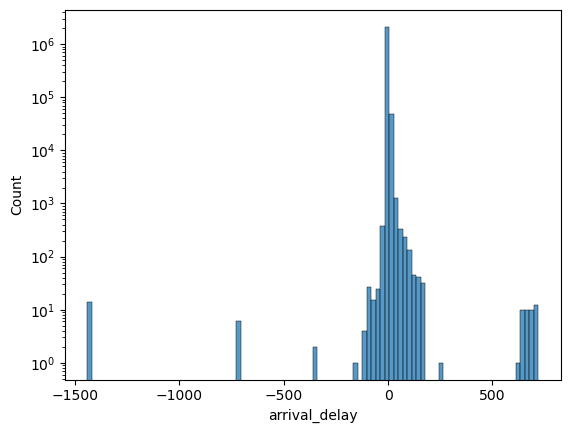

In [45]:
# This histogram coressponds to the delays in minutes for each arrival of each line (we remove the outliers)
sns.histplot(data=transport_data[(transport_data["arrival_delay"] > -10000) & (transport_data["arrival_delay"] < 10000)], x="arrival_delay", bins=100, log_scale=(False, True))

<AxesSubplot: xlabel='departure_delay', ylabel='Count'>

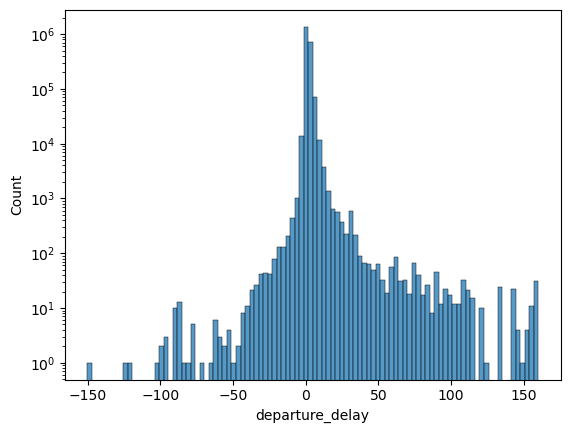

In [46]:
# This histogram coressponds to the delays in minutes for each departure of each line (we remove the outliers)
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -200) & (transport_data["departure_delay"] < 200)], x="departure_delay", bins=100, log_scale=(False, True))

We can see that the distributions on a logarithmic y are bi-modal. They seem to follow a laplace distribution centered around 0.

<AxesSubplot: xlabel='departure_delay', ylabel='Count'>

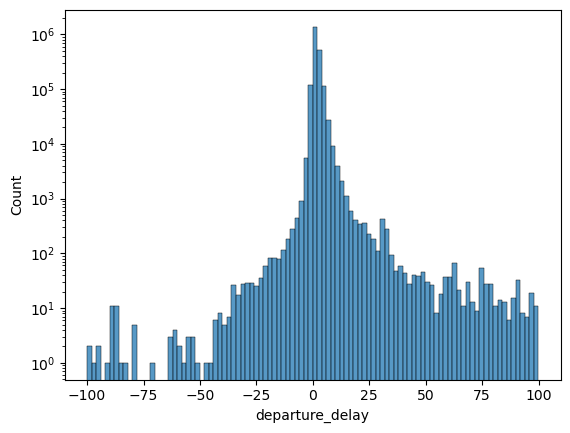

In [47]:
# This histogram coressponds to the delays in minutes for each departure of each line (we remove the outliers)
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -100) & (transport_data["departure_delay"] < 100)], x="departure_delay", bins=100, log_scale=(False, True))

<AxesSubplot: xlabel='arrival_delay', ylabel='Count'>

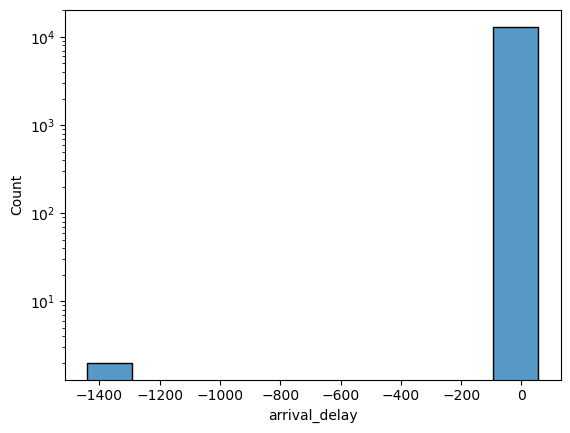

In [48]:
sns.histplot(data=transport_data.groupby("line_id").mean(numeric_only=True), x="arrival_delay", bins=10, log_scale=(False, True))

<AxesSubplot: xlabel='departure_delay', ylabel='Count'>

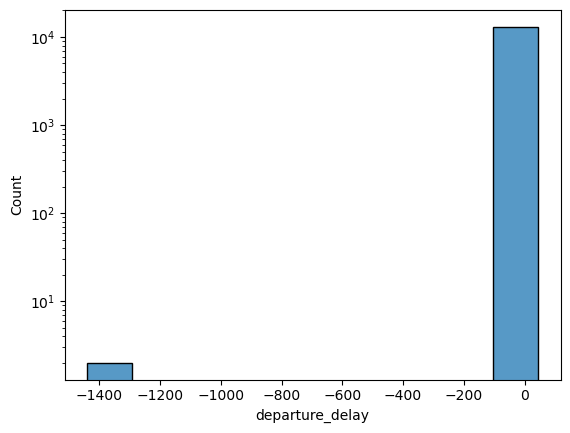

In [49]:
sns.histplot(data=transport_data.groupby("line_id").mean(numeric_only=True), x="departure_delay", bins=10, log_scale=(False, True))

## Analyse outliers and weird values

The delay is in minutes.

10000 minutes is 166 hours, which is 6.9 days. This is a lot.

In [51]:
transport_data[transport_data["arrival_delay"] > 10000].shape[0]

0

In [29]:
transport_data[transport_data["arrival_delay"] > 10000]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
902,2023-10-03,85:11:1093:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1093,IC6,<NA>,IC,...,Brig,2023-10-03 23:44:00,2023-11-03 00:02:15,REAL,NaT,NaT,NaN,False,43218.250000,NaN
1974,2023-10-03,85:11:14395:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,14395,S30,<NA>,S,...,Cheyres,2023-10-03 23:59:00,2023-11-03 00:01:20,REAL,2023-10-03 23:59:00,2023-11-03 00:01:57,REAL,False,43202.333333,43202.950000
1991,2023-10-03,85:11:14397:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,14397,S30,<NA>,S,...,Corcelles-Sud,2023-10-03 23:59:00,2023-11-03 00:01:29,PROGNOSE,2023-10-03 23:59:00,2023-11-03 00:04:28,REAL,False,43202.483333,43205.466667
2072,2023-10-03,85:11:14492:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,14492,S4,<NA>,S,...,Vallorbe,2023-10-03 23:49:00,2023-11-03 00:05:52,REAL,NaT,NaT,NaN,False,43216.866667,NaN
2461,2023-10-03,85:11:1545:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1545,IC,<NA>,IC,...,Neuchâtel,2023-10-03 23:56:00,2023-11-03 00:01:18,REAL,2023-10-03 23:58:00,2023-11-03 00:02:38,REAL,False,43205.300000,43204.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338619,2023-10-03,85:955:00041010122,85:955,TPL,Trasporti Pubblici Luganesi SA,Bus,85:955:410,10,<NA>,B,...,"Albonago, Sentiero di Camà",2023-10-03 23:59:00,2023-11-03 00:00:10,REAL,2023-10-03 23:59:00,2023-11-03 00:00:18,REAL,False,43201.166667,43201.300000
2339922,2023-10-03,85:955:00041212092,85:955,TPL,Trasporti Pubblici Luganesi SA,Bus,85:955:412,12,<NA>,B,...,"Castagnola, Roncaccio",2023-10-03 23:59:00,2023-11-03 00:00:02,REAL,2023-10-03 23:59:00,2023-11-03 00:00:12,REAL,False,43201.033333,43201.200000
2343121,2023-10-03,85:96:173:000,85:96,AVA-wsb,Aargau Verkehr AG,Zug,173,S14,<NA>,S,...,Unterkulm,2023-10-03 23:59:00,2023-11-03 00:00:13,PROGNOSE,2023-10-03 23:59:00,2023-11-03 00:03:30,REAL,False,43201.216667,43204.500000
2347126,2023-10-03,85:97:78:000,85:97,TRAVYS,Transports Vallée de Joux-Yverdon-Ste-Croix,Zug,78,R,<NA>,R,...,Essert-sous-Champvent,2023-10-03 23:57:00,2023-11-03 00:01:12,PROGNOSE,2023-10-03 23:57:00,2023-11-03 00:01:12,PROGNOSE,False,43204.200000,43204.200000


We can see that the problem comes from the fact that pandas reads the day in the "american" format rather than the ISO format...

Now after specifying day_first = True, we can see that the problem is gone.

In [52]:
transport_data[transport_data["arrival_delay"] > 1000].shape[0]

0

In [62]:
transport_data[transport_data["arrival_delay"] < -1000].shape[0]

14

In [63]:
transport_data[transport_data["arrival_delay"] < -1000]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
272887,2023-03-10,85:22:2005:000,85:22,AB-ab,Appenzeller Bahnen (ab),Zug,2005,S21,<NA>,S,...,Gfeld,2023-03-11 00:31:00,2023-03-10 00:30:49,REAL,2023-03-11 00:31:00,2023-03-10 00:31:22,REAL,False,-1440.183333,-1439.633333
272888,2023-03-10,85:22:2005:000,85:22,AB-ab,Appenzeller Bahnen (ab),Zug,2005,S21,<NA>,S,...,Bendlehn,2023-03-11 00:32:00,2023-03-10 00:32:07,REAL,2023-03-11 00:32:00,2023-03-10 00:32:43,REAL,False,-1439.883333,-1439.283333
272889,2023-03-10,85:22:2005:000,85:22,AB-ab,Appenzeller Bahnen (ab),Zug,2005,S21,<NA>,S,...,Speicher,2023-03-11 00:35:00,2023-03-10 00:34:10,REAL,NaT,NaT,NaN,False,-1440.833333,NaN
466603,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Frauenfeld Marktplatz,2023-03-11 00:28:00,2023-03-10 00:28:22,REAL,2023-03-11 00:28:00,2023-03-10 00:28:29,REAL,False,-1439.633333,-1439.516667
466604,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Lüdem,2023-03-11 00:30:00,2023-03-10 00:30:29,REAL,2023-03-11 00:30:00,2023-03-10 00:30:29,REAL,False,-1439.516667,-1439.516667
466605,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Weberei Matzingen,2023-03-11 00:33:00,2023-03-10 00:34:11,REAL,2023-03-11 00:33:00,2023-03-10 00:34:11,REAL,False,-1438.816667,-1438.816667
466606,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Matzingen,2023-03-11 00:36:00,2023-03-10 00:35:16,REAL,2023-03-11 00:36:00,2023-03-10 00:36:13,REAL,False,-1440.733333,-1439.783333
466607,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Jakobstal,2023-03-11 00:38:00,2023-03-10 00:39:13,REAL,2023-03-11 00:38:00,2023-03-10 00:39:13,REAL,False,-1438.783333,-1438.783333
466608,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Wiesengrund,2023-03-11 00:39:00,2023-03-10 00:40:13,REAL,2023-03-11 00:39:00,2023-03-10 00:40:13,REAL,False,-1438.783333,-1438.783333
466609,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Wängi,2023-03-11 00:41:00,2023-03-10 00:40:46,REAL,2023-03-11 00:41:00,2023-03-10 00:41:09,REAL,False,-1440.233333,-1439.850000


There seem to be a problem with the lines S21 and S15 from the Appenzeller Bahnen. The arrival/departure times and the forecasts are shifted by one day.

In [67]:
transport_data[(transport_data["arrival_delay"] < -100) & (transport_data["arrival_delay"] > -1000)]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
1004208,2023-03-10,85:801:10659-704,85:801,PAG,PostAuto AG,Bus,85:801:704,106,<NA>,B,...,"Bern, Obergericht",2023-03-10 18:39:00,2023-03-10 16:35:37,REAL,2023-03-10 18:39:00,2023-03-10 16:36:04,REAL,False,-123.383333,-122.933333
1004209,2023-03-10,85:801:10659-704,85:801,PAG,PostAuto AG,Bus,85:801:704,106,<NA>,B,...,"Bern, Mittelstrasse",2023-03-10 18:40:00,2023-03-10 16:37:21,REAL,NaT,NaT,NaN,False,-122.650000,NaN
1008705,2023-03-10,85:801:10570-709,85:801,PAG,PostAuto AG,Bus,85:801:709,105,<NA>,B,...,"Bern, Hauptbahnhof",2023-03-10 18:28:00,2023-03-10 16:34:53,REAL,NaT,NaT,NaN,False,-113.116667,NaN
1027259,2023-03-10,85:801:18059-903,85:801,PAG,PostAuto AG,Bus,85:801:903,180,<NA>,B,...,"Les Diablerets, Les Preises",2023-03-10 14:26:00,2023-03-10 11:55:41,PROGNOSE,2023-03-10 14:26:00,2023-03-10 14:26:00,PROGNOSE,False,-150.316667,0.000000
1126838,2023-03-10,85:816:166845-46011-1,85:816,AAGU,Auto AG Uri,Bus,85:816:407,407,364701,B,...,Amsteg St. Anton,2023-03-10 15:04:00,2023-03-10 13:22:04,UNBEKANNT,2023-03-10 15:04:00,2023-03-10 13:22:05,UNBEKANNT,False,-101.933333,-101.916667
1126839,2023-03-10,85:816:166845-46011-1,85:816,AAGU,Auto AG Uri,Bus,85:816:407,407,364701,B,...,Amsteg Post,2023-03-10 15:12:00,2023-03-10 13:22:06,REAL,NaT,NaT,NaN,False,-109.900000,NaN
1651761,2023-03-10,85:841:506-6906,85:841,AAGS,Auto AG Schwyz,Bus,85:841:506,506,<NA>,B,...,<NA>,2023-03-10 15:58:00,2023-03-10 09:58:28,REAL,NaT,NaT,NaN,False,-359.533333,NaN
1651776,2023-03-10,85:841:506-6917,85:841,AAGS,Auto AG Schwyz,Bus,85:841:506,506,<NA>,B,...,<NA>,2023-03-10 16:17:00,2023-03-10 10:18:59,REAL,NaT,NaT,NaN,False,-358.016667,NaN
2010822,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Collège Sismondi",2023-03-10 17:46:00,2023-03-10 05:56:41,PROGNOSE,2023-03-10 17:46:00,2023-03-10 05:56:41,PROGNOSE,False,-709.316667,-709.316667
2010823,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Maison de la Paix",2023-03-10 17:47:00,2023-03-10 05:56:41,PROGNOSE,2023-03-10 17:47:00,2023-03-10 05:56:41,PROGNOSE,False,-710.316667,-710.316667


We can also see some transports that arrived or departed more than 100 minutes (less than 1000 minutes) before the scheduled time.

In [75]:
transport_data[transport_data["arrival_delay"] > 700]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
2010828,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Stand",2023-03-10 17:58:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 17:58:00,2023-03-11 05:56:41,PROGNOSE,False,718.683333,718.683333
2010829,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Cirque",2023-03-10 18:00:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:00:00,2023-03-11 05:56:41,PROGNOSE,False,716.683333,716.683333
2010830,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Plainpalais",2023-03-10 18:02:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:02:00,2023-03-11 05:56:41,PROGNOSE,False,714.683333,714.683333
2010831,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Uni-Mail",2023-03-10 18:03:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:03:00,2023-03-11 05:56:41,PROGNOSE,False,713.683333,713.683333
2010832,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Acacias",2023-03-10 18:05:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:05:00,2023-03-11 05:56:41,PROGNOSE,False,711.683333,711.683333
2010833,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Industrielle",2023-03-10 18:07:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:07:00,2023-03-11 05:56:41,PROGNOSE,False,709.683333,709.683333
2010834,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Carouge GE, Pictet-Thellusson",2023-03-10 18:08:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:08:00,2023-03-11 05:56:41,PROGNOSE,False,708.683333,708.683333
2010835,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Lancy-Pont-Rouge, gare/Etoile",2023-03-10 18:10:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:10:00,2023-03-11 05:56:41,PROGNOSE,False,706.683333,706.683333
2010836,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Grand-Lancy, Mairie de Lancy",2023-03-10 18:12:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:12:00,2023-03-11 05:56:41,PROGNOSE,False,704.683333,704.683333
2010837,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Grand-Lancy, Place du 1er-Août",2023-03-10 18:13:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:13:00,2023-03-11 05:56:41,PROGNOSE,False,703.683333,703.683333


This tram seem to have delayed 11 hours wich seems a bit weird and might be an error or has default values for the arrival/departure times.

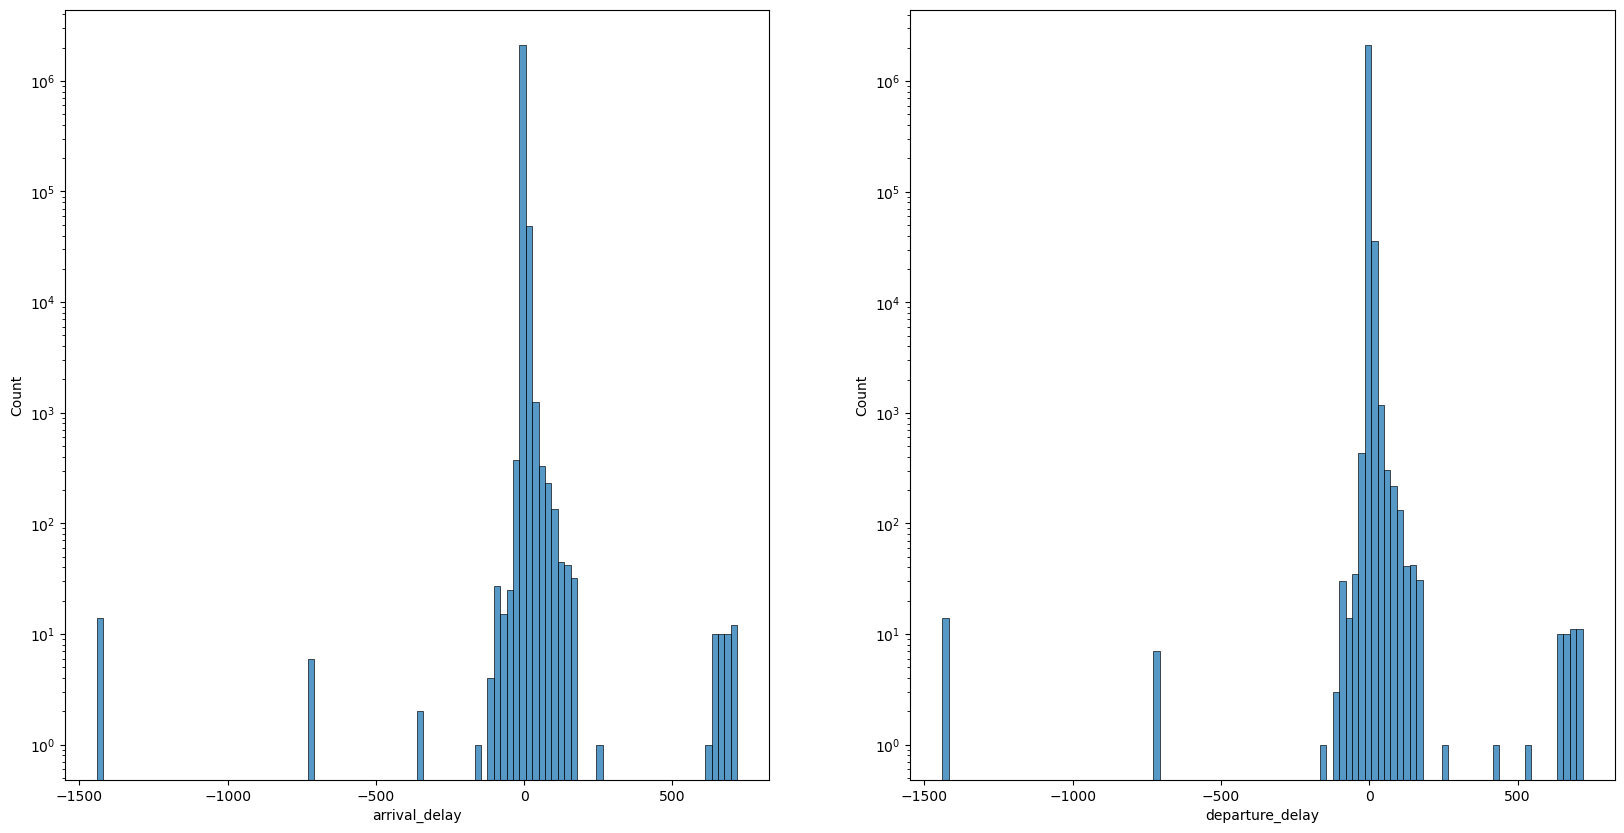

In [79]:
# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=transport_data[(transport_data["arrival_delay"] > -10000) & (transport_data["arrival_delay"] < 10000)], x="arrival_delay", bins=100, log_scale=(False, True), ax=ax[0])
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -10000) & (transport_data["departure_delay"] < 10000)], x="departure_delay", bins=100, log_scale=(False, True), ax=ax[1])

plt.show()

Show statistics delays for each line each day on a website 

## **🧭 Add the Stop Coordinates**

TODO